In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
path = "D:/2 Code/MAS/NHANES_age_prediction.csv"
file = path.split('/')
tittle = file[-1].replace('.csv','')
tittle

'NHANES_age_prediction'

In [23]:
def readcsv(path):
    order = pd.read_csv(path)
    return order

order = readcsv(path)
order

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [33]:
df = order[['RIDAGEYR', 'BMXBMI']]
df = pd.DataFrame(df)
df_description = df.describe()

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

min_ = df.quantile(0)
max_ = df.quantile(1)
range_ = max_ - min_

correlation = df['RIDAGEYR'].corr(df['BMXBMI'])


RIDAGEYR    68.0
BMXBMI      55.6
dtype: float64

In [36]:
data = df_description
data.loc['Median'] = df.quantile(0.5)
data.loc['Range'] = range_
data.loc['IQR'] = iqr

print(data)
print('Correlation of Age and BMXBMI',correlation)

           RIDAGEYR       BMXBMI
count   2278.000000  2278.000000
mean      41.795874    27.955180
std       20.156111     7.248962
min       12.000000    14.500000
25%       24.000000    22.800000
50%       41.000000    26.800000
75%       58.000000    31.200000
max       80.000000    70.100000
Range     68.000000    55.600000
IQR       34.000000     8.400000
Median    41.000000    26.800000
Correlation of Age and BMXBMI 0.14716312923328329


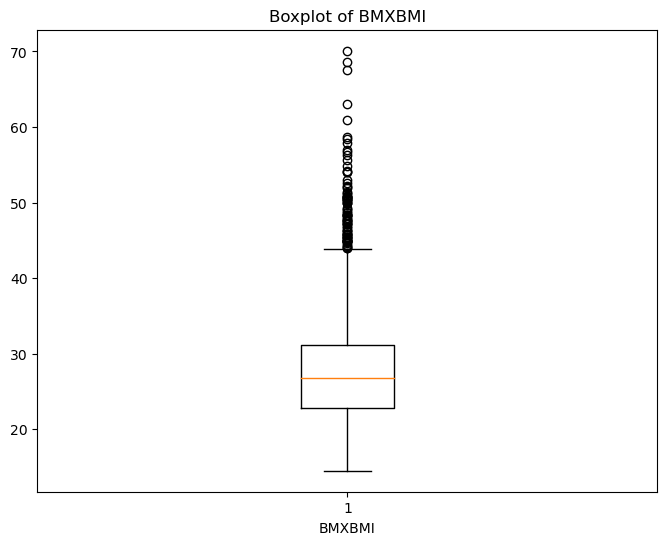

In [26]:
plt.show()
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['BMXBMI'])  
plt.title('Boxplot of BMXBMI')
plt.xlabel('BMXBMI')
plt.show()

In [40]:
df1 = df.loc[(df.BMXBMI <= 18.5), ['RIDAGEYR','BMXBMI']]
df2 = df.loc[(df.BMXBMI <= 25) & (df.BMXBMI >18.5),['RIDAGEYR','BMXBMI']]
df3 = df.loc[(df.BMXBMI <= 30) & (df.BMXBMI >25),['RIDAGEYR','BMXBMI']]
df4 = df.loc[(df.BMXBMI <= 35) & (df.BMXBMI >30),['RIDAGEYR','BMXBMI']]
df5 = df.loc[(df.BMXBMI >35),['RIDAGEYR','BMXBMI']]
f = [df1['BMXBMI'],df2['BMXBMI'],df3['BMXBMI'],df4['BMXBMI'],df5['BMXBMI']]
f1 = [df1.describe(),df2.describe(),df3.describe(),df4.describe(),df5.describe()]
f1

[        RIDAGEYR     BMXBMI
 count  88.000000  88.000000
 mean   26.386364  17.318182
 std    19.676949   0.914826
 min    12.000000  14.500000
 25%    13.000000  16.900000
 50%    16.000000  17.400000
 75%    34.250000  18.100000
 max    80.000000  18.500000,
          RIDAGEYR      BMXBMI
 count  795.000000  795.000000
 mean    37.416352   22.122767
 std     20.855904    1.753994
 min     12.000000   18.600000
 25%     18.000000   20.700000
 50%     32.000000   22.200000
 75%     55.000000   23.700000
 max     80.000000   25.000000,
          RIDAGEYR      BMXBMI
 count  688.000000  688.000000
 mean    46.850291   27.437645
 std     19.530351    1.365021
 min     12.000000   25.100000
 25%     31.000000   26.300000
 50%     46.000000   27.400000
 75%     62.250000   28.600000
 max     80.000000   30.000000,
          RIDAGEYR      BMXBMI
 count  391.000000  391.000000
 mean    44.810742   32.098210
 std     18.044816    1.394356
 min     12.000000   30.100000
 25%     31.500000   30

In [28]:
x = ['Under Weight\n<18.5', 'Normal\n18.5 - 25','Over Weight\n25 - 30','Obese\n(30 - 35)','Extreme Obese\n35>']
mean_v = []
std_v= []
x_cell = []
remove_id = 0
for i in x:
    c = i.split('\n')
    x_cell.append(c[0])
for i in f1:
    mean_v.append(i['BMXBMI'].describe()['mean'])
    std_v.append(i['BMXBMI'].describe()['std'])
mean = dict()
std = dict()
for i in range(len(x)):
    mean[x_cell[i]] = mean_v[i]
    std[x_cell[i]] = std_v[i]
print(mean)
print(std)

{'Under Weight': 17.318181818181817, 'Normal': 22.122767295597484, 'Over Weight': 27.437645348837208, 'Obese': 32.09820971867008, 'Extreme Obese': 41.59113924050633}
{'Under Weight': 0.914826213575525, 'Normal': 1.753994330312352, 'Over Weight': 1.365021013037398, 'Obese': 1.3943556059719149, 'Extreme Obese': 6.285224595972716}


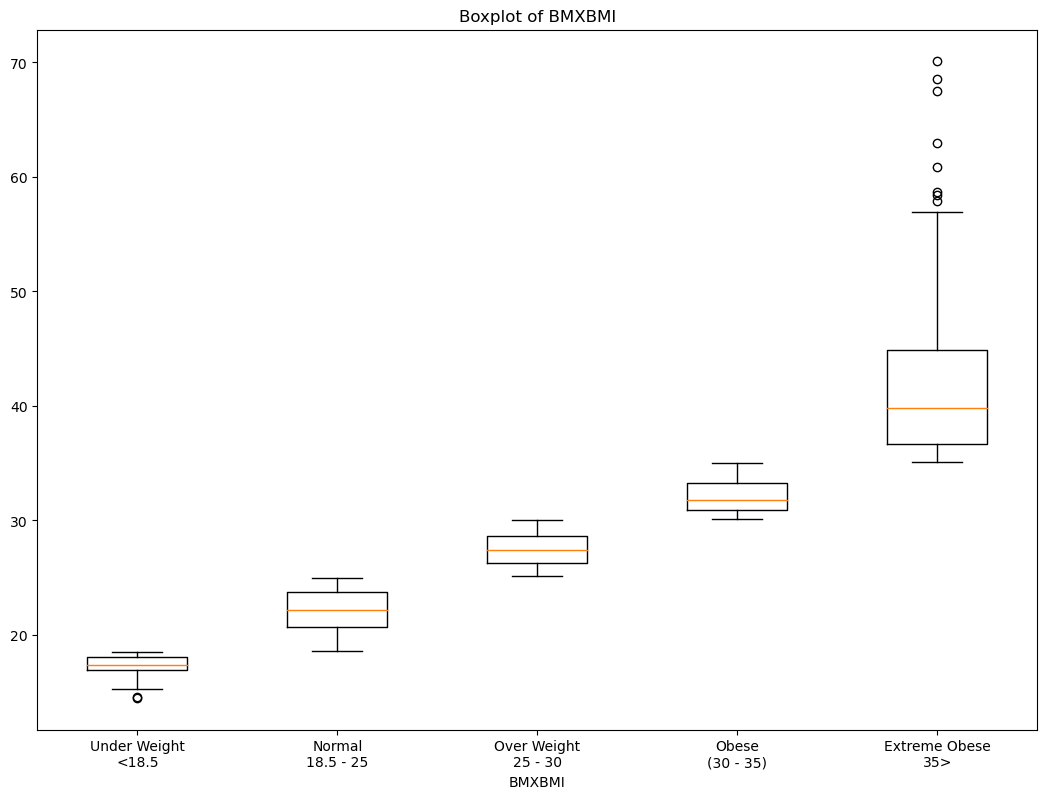

In [29]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(f) 
ax.set_xticklabels(x)
plt.title('Boxplot of BMXBMI')
plt.xlabel('BMXBMI')
plt.show()

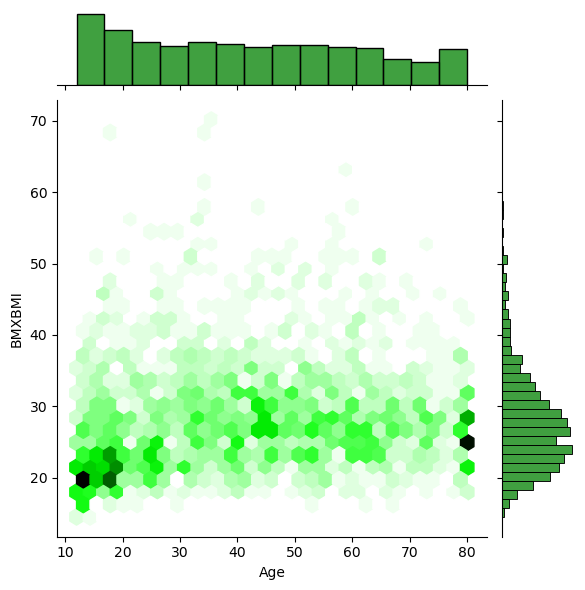

In [30]:
x = df['RIDAGEYR']
y = df['BMXBMI']
sns.jointplot(x=x, y=y, kind='hex', color='green')
plt.xlabel('Age')
plt.ylabel('BMXBMI')
plt.show()